In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd
pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings('ignore')



import numpy as np



'''# extension 
!pip install -q jupyter_contrib_nbextensions 
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user 

!jupyter nbextension enable hinterland/hinterland '''

'# extension \n!pip install -q jupyter_contrib_nbextensions \n!jupyter contrib nbextension install --user\n!jupyter nbextensions_configurator enable --user \n\n!jupyter nbextension enable hinterland/hinterland '

In [6]:
def SevenSigma(df):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    # Display the shape of the dataset
    print(f"Shape of the dataset: {df.shape}")
    print("\n")

    # Display a sample of the dataset
    print("Sample from Dataset:")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("\n")

    # Display general information about the dataset
    print("Information of Dataset:")
    display(df.info())
    print("\n")

    # Display descriptive statistics for numeric features
    print("Description of Dataset for Numeric Features:")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("\n")


    # Display correlation heatmap for numeric features
    print("Correlation Heatmap:")
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show();
    print("\n")

    # Display percentage of null values in the dataset
    print("Null Values in Dataset:")
    display(df.isnull().mean() * 100)
    print("\n")

    # Display duplicate rows in the dataset
    print("Duplicate Rows in Dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

In [7]:
!pip install yfinance -q

In [8]:
import yfinance as yf

def fetch_historical_data(ticker):
   """Fetches historical stock data from Yahoo Finance and selects the latest 5000 records if needed.

   Args:
       ticker (str): The stock ticker symbol.

   Returns:
       pandas.DataFrame: The historical data for the stock, containing up to 5000 records.
   """
    
   df = yf.download(ticker)  # Fetch entire dataset without start and end dates
   df.sort_index(ascending=False,inplace=True)
   if len(df) > 1100:
       df = df.iloc[:1100]  # Select latest 5000 records if necessary

   return df




In [9]:
# Example usage:
ticker = "AAPL"
df = fetch_historical_data(ticker)

[*********************100%%**********************]  1 of 1 completed


Shape of the dataset: (1100, 6)


Sample from Dataset:




Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1100 entries, 2024-03-01 to 2019-10-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1100 non-null   float64
 1   High       1100 non-null   float64
 2   Low        1100 non-null   float64
 3   Close      1100 non-null   float64
 4   Adj Close  1100 non-null   float64
 5   Volume     1100 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.2 KB


None



Description of Dataset for Numeric Features:




Correlation Heatmap:


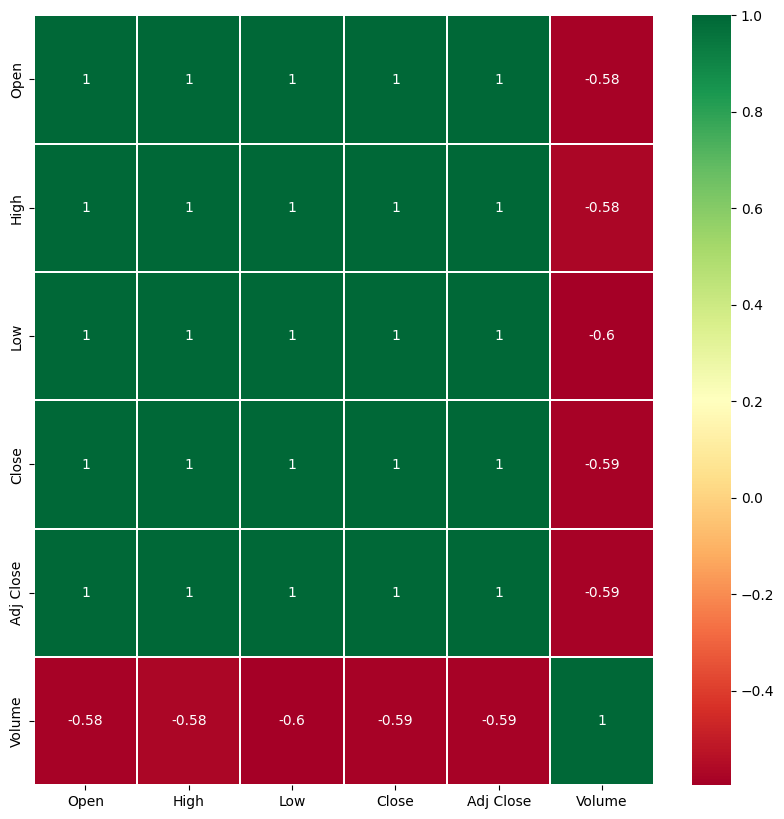



Null Values in Dataset:


Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64



Duplicate Rows in Dataset:


In [10]:
SevenSigma(df)

In [11]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)

In [12]:
#px.area(df,y='Close',x=list(df.index))

In [13]:
'''fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df.index, y=df['Close'],fill='tozeroy'))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
'''

'fig = go.Figure()\n\nfig.add_trace(\n    go.Scatter(x=df.index, y=df[\'Close\'],fill=\'tozeroy\'))\n\n# Set title\nfig.update_layout(\n    title_text="Time series with range slider and selectors"\n)\n\n# Add range slider\nfig.update_layout(\n    xaxis=dict(\n        rangeselector=dict(\n            buttons=list([\n                dict(count=1,\n                     label="1m",\n                     step="month",\n                     stepmode="backward"),\n                dict(count=6,\n                     label="6m",\n                     step="month",\n                     stepmode="backward"),\n                dict(count=1,\n                     label="YTD",\n                     step="year",\n                     stepmode="todate"),\n                dict(count=1,\n                     label="1y",\n                     step="year",\n                     stepmode="backward"),\n                dict(step="all")\n            ])\n        ),\n        rangeslider=dict(\n            visib

In [14]:
'''ma_day = [10, 20, 50]

for days in ma_day:
    column_name = f"MA_{days}"
    df[column_name] = df['Adj Close'].rolling(days).mean()
        '''

'ma_day = [10, 20, 50]\n\nfor days in ma_day:\n    column_name = f"MA_{days}"\n    df[column_name] = df[\'Adj Close\'].rolling(days).mean()\n        '

In [15]:
'''fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Adj Close']))
fig.add_trace(go.Scatter(x=df.index, y=df['MA_10']))
fig.add_trace(go.Scatter(x=df.index, y=df['MA_20']))
fig.add_trace(go.Scatter(x=df.index, y=df['MA_50']))

fig.show()'''

"fig = go.Figure()\n\nfig.add_trace(go.Scatter(x=df.index, y=df['Adj Close']))\nfig.add_trace(go.Scatter(x=df.index, y=df['MA_10']))\nfig.add_trace(go.Scatter(x=df.index, y=df['MA_20']))\nfig.add_trace(go.Scatter(x=df.index, y=df['MA_50']))\n\nfig.show()"

In [16]:
df['Daily Return'] = df['Adj Close'].pct_change()

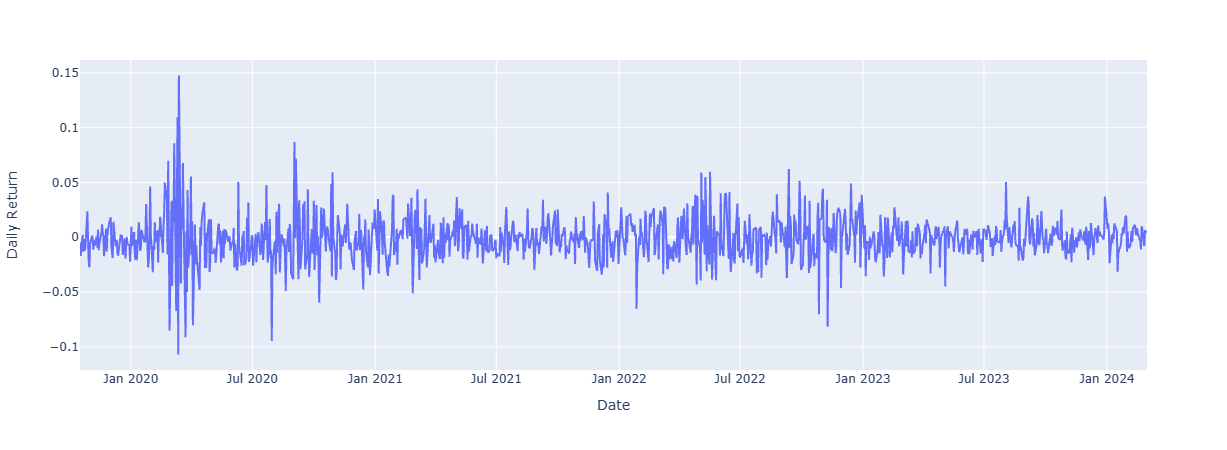

In [17]:
px.line(df,x=df.index,y="Daily Return")

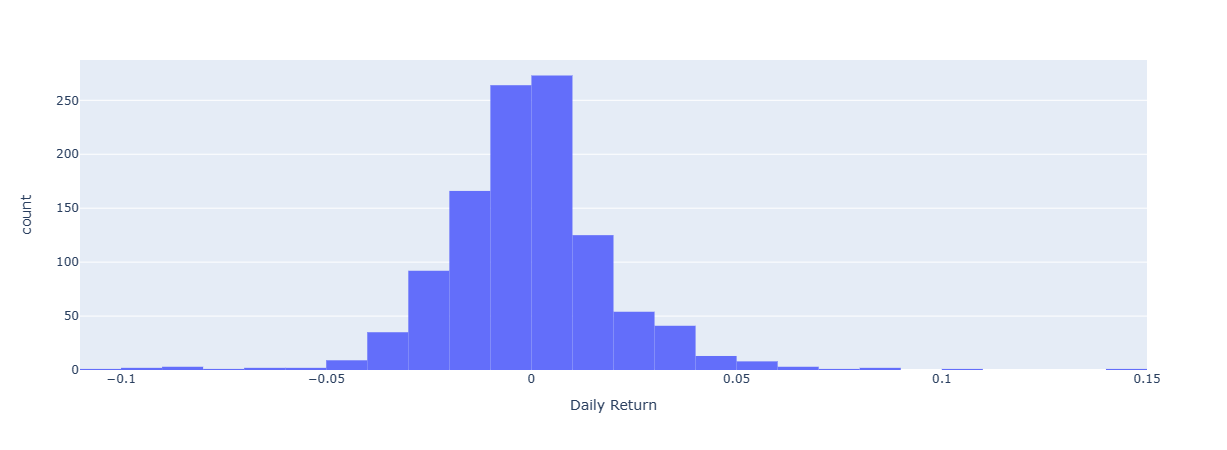

In [18]:
px.histogram(df,x='Daily Return',nbins=50)

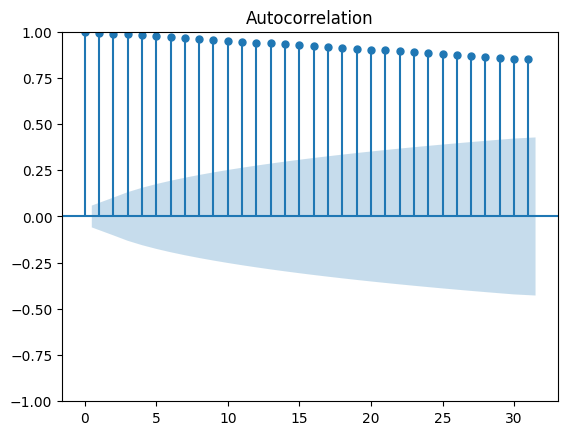

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
#df["Close"].iloc[0] = 0
plot_acf(df["Close"])
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].values)
result

(-0.39675464483449363,
 0.9106392269399497,
 0,
 1099,
 {'1%': -3.4363141853066232,
  '5%': -2.864173472014944,
  '10%': -2.568172143730631},
 5108.072742823027)

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns = ['Close']
for column in core_columns:
    decomp = seasonal_decompose(df[column], period=7, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

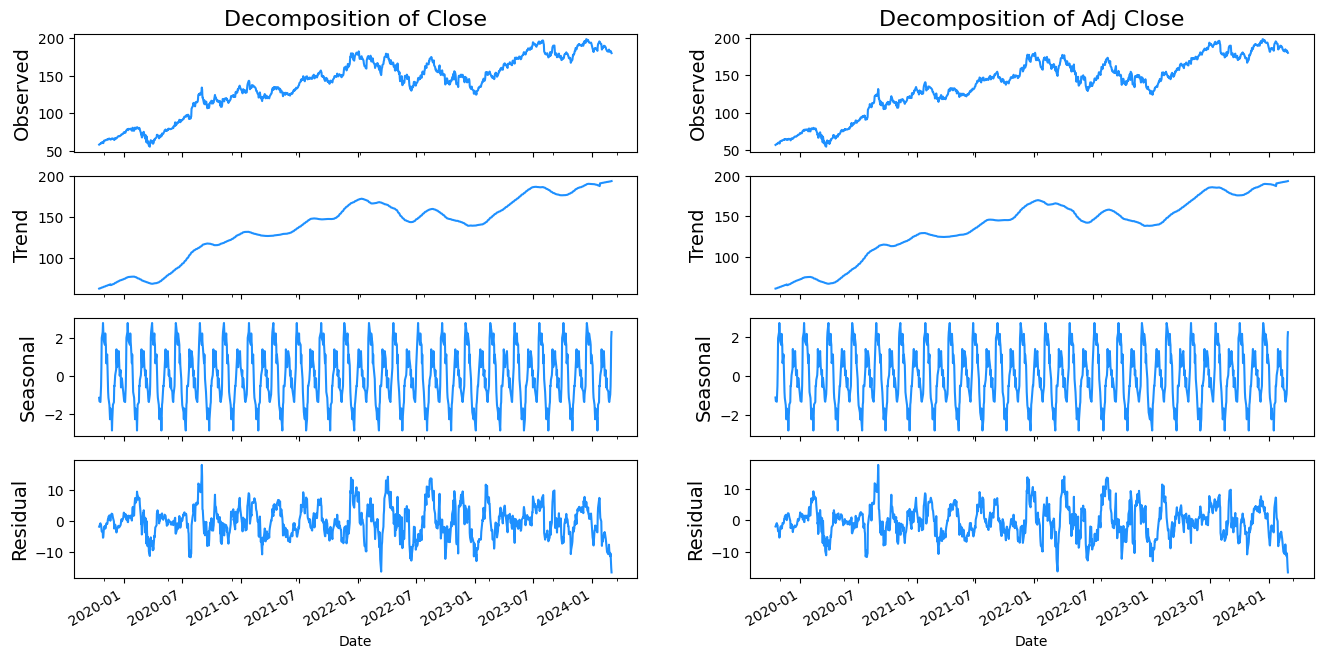

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['Close','Adj Close']):
    
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()


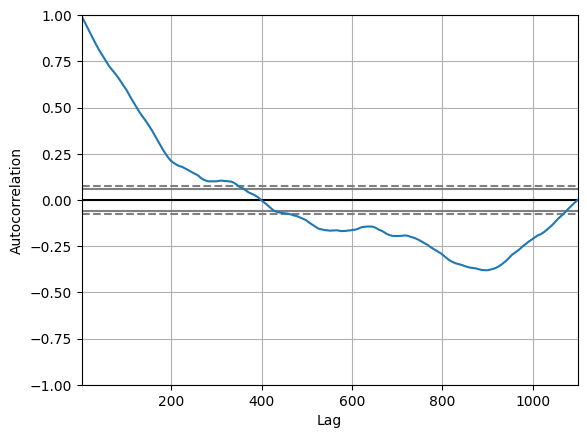

In [23]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Close'])
plt.show()

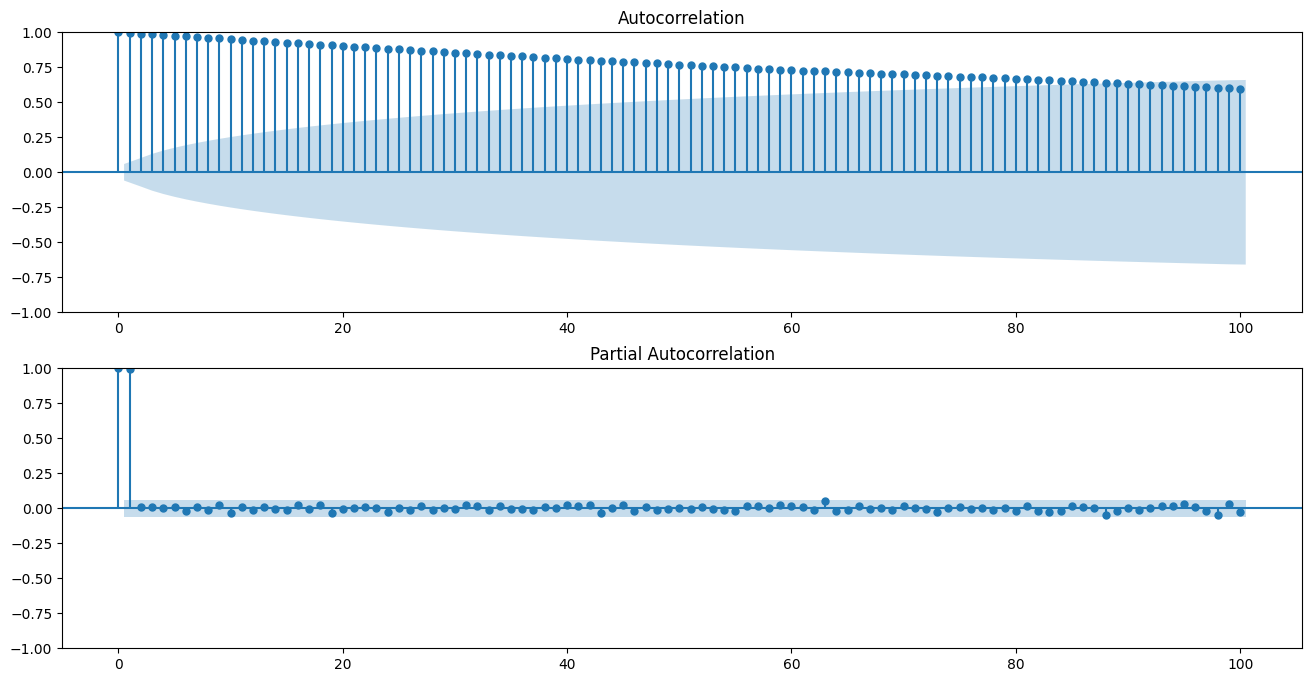

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['Close'], lags=100, ax=ax[0])
plot_pacf(df['Close'], lags=100
          , ax=ax[1])

plt.show()

In [25]:
'''f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()'''

'f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))\n\nfor i, (train_index, valid_index) in enumerate(folds.split(X)):\n    X_train, X_valid = X[train_index], X[valid_index]\n    y_train, y_valid = y[train_index], y[valid_index]\n\n    sns.lineplot(\n        x=X_train, \n        y=y_train, \n        ax=ax[i,0], \n        color=\'dodgerblue\', \n        label=\'train\'\n    )\n    sns.lineplot(\n        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], \n        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], \n        ax=ax[i,1], \n        color=\'dodgerblue\', \n        label=\'train\'\n    )\n\n    for j in range(2):\n        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color=\'darkorange\', label=\'validation\')\n    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)\n    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fo

In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def MASE(Actual, Predicted):
    values = []
    for i in range(1, len(Actual)):
        values.append(abs(Actual[i] - Predicted[i]) / (abs(Actual[i] - Actual[i - 1]) / len(Actual) - 1))
    return np.mean(values)


def print_error_metrics(y_true, y_pred):
  """
  This function calculates and prints MAE, MAPE, and RMSE error metrics using scikit-learn.

  Args:
    y_true: The ground truth values (list of floats).
    y_pred: The predicted values (list of floats).
  """

  # Calculate MAE
  mae = mean_absolute_error(y_true, y_pred)

  rmse = np.sqrt(((y_pred - y_true) ** 2).mean())

  # Calculate MAPE
  mape = mean_absolute_percentage_error(y_true, y_pred) * 100


  mase = MASE(y_true, y_pred)

  # Print results
  print("MAE:", mae)
  print("RMSE", rmse)
  print("MAPE:", mape, "%")
  print("MASE:", rmse)



# LSTM


In [27]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01')
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.433825   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.500646   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.639428   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.771559   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.751303   
...                ...         ...         ...         ...         ...   
2024-02-26  182.240005  182.759995  180.649994  181.160004  181.160004   
2024-02-27  181.100006  183.919998  179.559998  182.630005  182.630005   
2024-02-28  182.509995  183.119995  180.130005  181.419998  181.419998   
2024-02-29  181.270004  182.570007  179.529999  180.750000  180.750000   
2024-03-01  179.550003  180.529999  177.380005  179.660004  179.660004   

               Volume  
Date                   
2012-01-03  302220800  
2012-01-04  260022000  
2012-01-05  271269600  
2012-01-06  318292800  
2012-01-09  394024400  
...               ...  
2024-02-26   40867400  
2024-02-27   54318900  
2024-02-28   48953900  
2024-02-29  136682600  
2024-03-01   73488000  

[3060 rows x 6 columns]

In [28]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array

dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(3030)

training_data_len

3030

In [29]:
len(data)

3060

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [31]:
train_data = scaled_data[0:int(3030), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L2
# Hyperparameter adjustments
epochs = 7 # Increase epochs for more training
batch_size = 32  # Experiment with different batch sizes
learning_rate = 0.001  # Adjust learning rate

# Build the LSTM model
model = Sequential()


# Compile the model with an optimizer, loss function, and metrics

model.add(LSTM(128, return_sequences=True,input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.2)) 

model.add(Dense(64, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,313 (1.82 MB)

 Trainable params: 477,313 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adamax', loss='mse') 

model.fit(x_train, y_train, 
          batch_size=16, epochs=7)

Epoch 1/7
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.6287
Epoch 2/7
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0775
Epoch 3/7
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0206
Epoch 4/7
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0084
Epoch 5/7
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0057
Epoch 6/7
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0045
Epoch 7/7
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense

model = Sequential()

# First LSTM layer
model.add(LSTM(128, input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))

# Second LSTM layer 
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

# GRU layer to capture additional patterns
model.add(GRU(32, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layer 
model.add(Dense(16, activation='relu'))
model.add(Dense(1))



In [52]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,921 (491.88 KB)

 Trainable params: 125,921 (491.88 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
model.compile(loss='mae', optimizer='adam')

# Use ReduceLROnPlateau to reduce learning rate on plateau
lr_callback = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2) 

# Fit model with learning rate schedule
model.fit(x_train, y_train, 
          epochs=50, batch_size=32, 
          callbacks=[lr_callback])

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0245 - learning_rate: 0.0010
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0202 - learning_rate: 0.0010
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0210 - learning_rate: 0.0010
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201 - learning_rate: 0.0010
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201 - learning_rate: 0.0010
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0199 - learning_rate: 0.0010
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0204 - learning_rate: 0.0010
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0198 - learning_rate: 0.0010
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179 - learning_rate: 2.0000e-04
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0178 - learning_rate: 2.0000e-04
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0172 - learning_rate: 2.0000e

In [67]:
test_data = scaled_data[3030 - 100: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[3030:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


13.255513837641807

In [68]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

print_error_metrics(y_test,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 12.805958048502605
RMSE 13.255513837641807
MAPE: 6.828230405224798 %
MASE: 13.255513837641807


100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
MAE: 3.895979039809283
RMSE 4.867886401465525
MAPE: 2.1273133783655895 %
MASE: 4.867886401465525

60
MAE: 4.956250558491626
RMSE 6.020750610787985
MAPE: 2.735511653822269 %
MASE: 6.020750610787985


7 epoch 100
MAE: 3.509126775404986
RMSE 4.429329590466838
MAPE: 2.0833427380817544 %
MASE: 4.429329590466838

max
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
MAE: 6.064279070087507
RMSE 6.9463395435500495
MAPE: 3.485903042955544 %
MASE: 6.9463395435500495

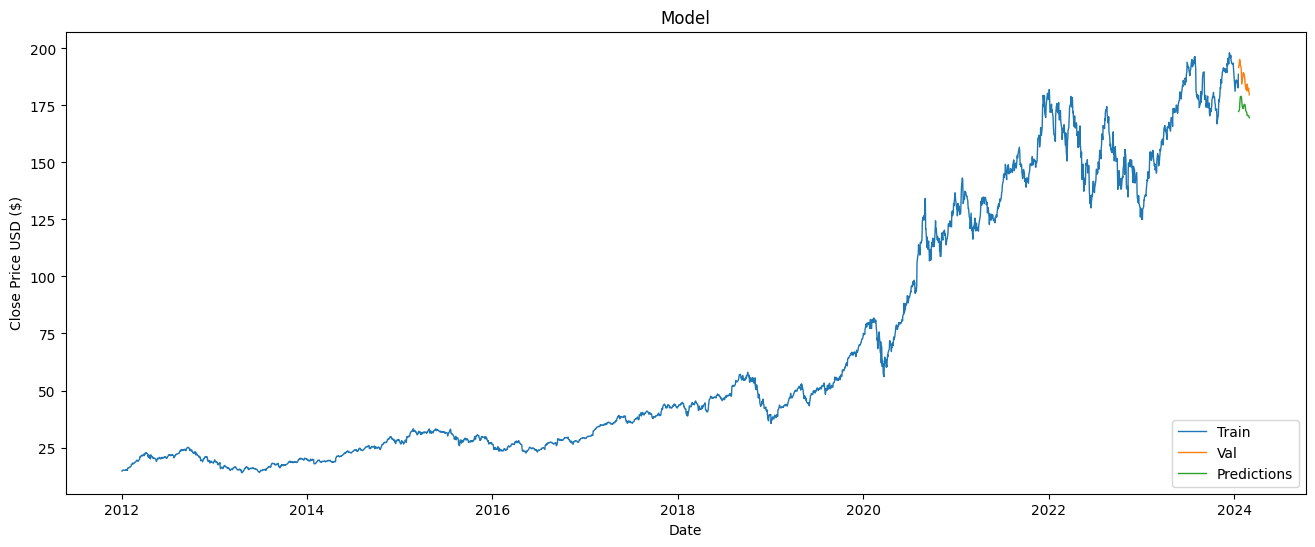

In [69]:
# Plot the data
train = df[:3030]
valid = df[3030:]
valid['Predictions'] = y_pred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'],linewidth=1)
plt.plot(valid[['Close', 'Predictions']],linewidth=1)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [70]:
valid[['Close','Predictions']]

Close  Predictions
Date                               
2024-01-19  191.559998   172.319550
2024-01-22  193.889999   172.991638
2024-01-23  195.179993   174.494446
2024-01-24  194.500000   176.387680
2024-01-25  194.169998   177.959061
2024-01-26  192.419998   178.869171
2024-01-29  191.729996   178.980499
2024-01-30  188.039993   178.520355
2024-01-31  184.399994   177.497009
2024-02-01  186.860001   175.964951
2024-02-02  185.850006   174.656540
2024-02-05  187.679993   173.788895
2024-02-06  189.300003   173.579880
2024-02-07  189.410004   174.010422
2024-02-08  188.320007   174.731537
2024-02-09  188.850006   175.284225
2024-02-12  187.149994   175.529678
2024-02-13  185.039993   175.325211
2024-02-14  184.149994   174.644638
2024-02-15  183.860001   173.676712
2024-02-16  182.309998   172.714035
2024-02-20  181.559998   171.828491
2024-02-21  182.320007   171.056107
2024-02-22  184.369995   170.543503
2024-02-23  182.520004   170.507645
2024-02-26  181.160004   170.607468
2024-02-27  182.630005   170.498749
2024-02-28  181.419998   170.313339
2024-02-29  180.750000   170.009903
2024-03-01  179.660004   169.589905

In [91]:
x_test.shape

(153, 100, 1)

In [75]:
ar = np.array(temp).reshape(1,len(temp),1)
ar.shape

(1, 101, 1)

In [74]:
ar[-100:,:]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [52]:
arr = np.array(temp)
arr = arr.reshape(1,101,1)
arr.shape

(1, 101, 1)

In [59]:
arr = dataset[-100:,:]
arr.shape
arr = arr.reshape(1,100,1)
arr.shape

(1, 100, 1)

In [178]:
scaled_data

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [39]:
def FuturePrediction(fdays,model,dataset):
    predictions = []
    
    for i in range(fdays):
        data = dataset[:,-100:,:]
        #print(data.shape)
        stacked_data = data.reshape(1,100,1)
        #print(stacked_data.shape)
        pred = model.predict(stacked_data)
        #print(pred.shape)
        dataset_list = list(dataset[0,:,0])
        pred = pred[0][0]
        #print(pred.shape)
        dataset_list.append(pred)
        predictions.append(pred)
        #print(np.shape(dataset_list))
        dataset = np.array(dataset_list).reshape(1,len(dataset_list),1)
      
       
    
    return np.array(predictions)

In [136]:
len(list(scaled_data[0,:,0]))

3060

In [41]:
tests_data = scaled_data[:3030]

In [180]:
tests_data.shape


(3030, 1)

In [42]:
tests_data = tests_data.reshape(1,len(tests_data),1)

In [127]:
scaled_data[:,-100:,:].shape

(1, 100, 1)

In [59]:
preds = FuturePrediction(30,model,tests_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [60]:
preds

array([0.9017332 , 0.90120494, 0.89905626, 0.89546883, 0.8908813 ,
       0.88576055, 0.8804831 , 0.8752951 , 0.8703227 , 0.8656022 ,
       0.86111426, 0.8568162 , 0.85265994, 0.8486054 , 0.8446233 ,
       0.8406956 , 0.8368131 , 0.8329723 , 0.82917297, 0.82541615,
       0.82170296, 0.8180339 , 0.8144091 , 0.8108281 , 0.80729   ,
       0.80379415, 0.8003393 , 0.7969247 , 0.7935493 , 0.790221  ],
      dtype=float32)

In [61]:
sprice = scaler.inverse_transform(preds.reshape(-1,1))

In [ ]:
scaled_data[]

In [62]:
sprice

array([[180.01294],
       [179.91565],
       [179.51994],
       [178.85928],
       [178.01442],
       [177.07138],
       [176.09947],
       [175.14403],
       [174.2283 ],
       [173.35896],
       [172.53246],
       [171.7409 ],
       [170.97548],
       [170.22879],
       [169.49544],
       [168.77211],
       [168.05708],
       [167.34976],
       [166.65007],
       [165.9582 ],
       [165.27437],
       [164.59866],
       [163.9311 ],
       [163.27162],
       [162.62004],
       [161.97624],
       [161.33998],
       [160.71115],
       [160.08952],
       [159.47656]], dtype=float32)

In [193]:
preds

array([0.9349108 , 0.93619144, 0.93771297, 0.9393812 , 0.94113714,
       0.94294393, 0.94477856, 0.94662654, 0.94847864, 0.9503287 ,
       0.9521727 , 0.9540074 , 0.95583093, 0.95764154, 0.959438  ,
       0.9612196 , 0.96298563, 0.96473545, 0.9664688 , 0.96818554,
       0.96988535, 0.9715682 , 0.9732342 , 0.9748832 , 0.9765154 ,
       0.9781308 , 0.9797295 , 0.98131174, 0.9828773 , 0.98442674],
      dtype=float32)

In [63]:
print_error_metrics(scaled_data[3030:][:,0],preds)

MAE: 0.09299503965994796
RMSE 0.09430999820020645
MAPE: 9.941310138565159 %
MASE: 0.09430999820020645


In [198]:
data['Close'][3030:].values

array([191.55999756, 193.88999939, 195.17999268, 194.5       ,
       194.16999817, 192.41999817, 191.72999573, 188.03999329,
       184.3999939 , 186.86000061, 185.8500061 , 187.67999268,
       189.30000305, 189.41000366, 188.32000732, 188.8500061 ,
       187.1499939 , 185.03999329, 184.1499939 , 183.86000061,
       182.30999756, 181.55999756, 182.32000732, 184.36999512,
       182.52000427, 181.16000366, 182.63000488, 181.41999817,
       180.75      , 179.66000366])

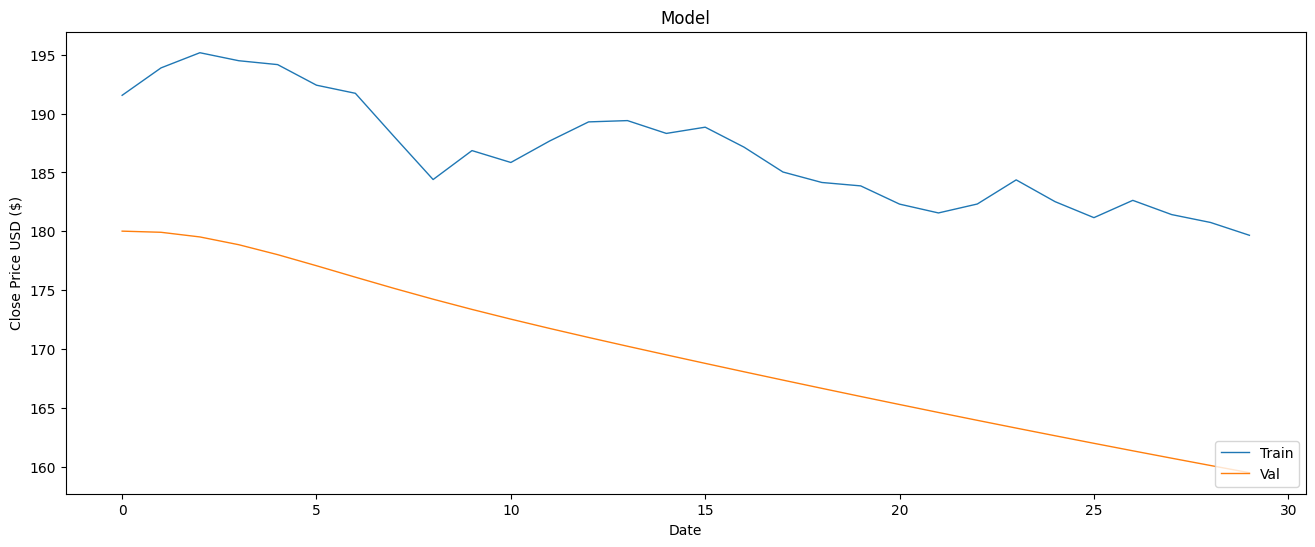

In [64]:

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(data['Close'][3030:].values,linewidth=1)
plt.plot(sprice,linewidth=1)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

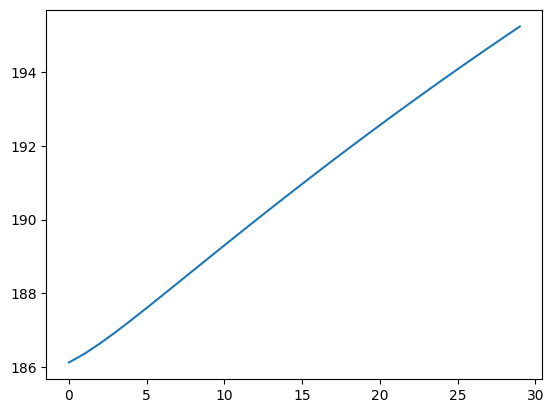

In [185]:
plt.plot(sprice)

In [109]:
np.array([[0.9182804]])[0][0]

0.9182804

# ARIMA

In [8]:
df_close = df.filter(['Close'])

<Axes: ylabel='Density'>

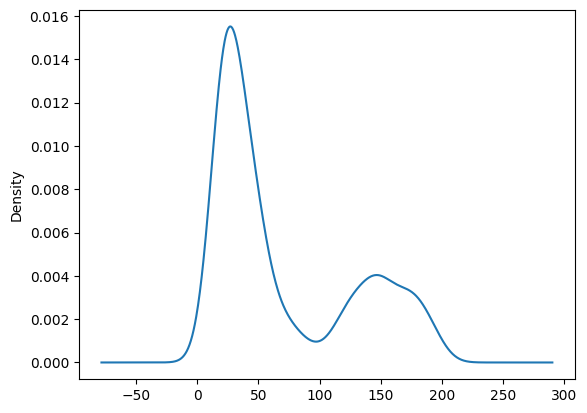

In [9]:
df['Close'].plot(kind='kde')

In [10]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    


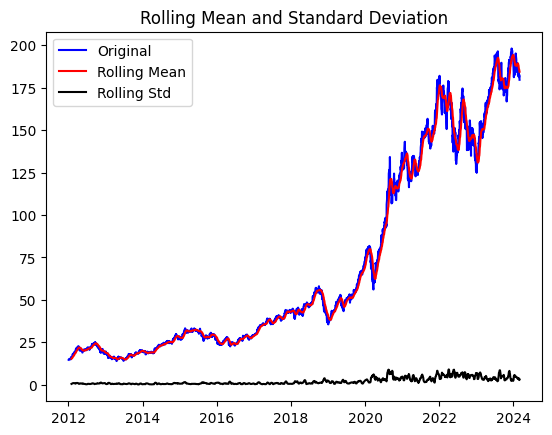

Results of dickey fuller test


NameError: name 'adfuller' is not defined

In [11]:
test_stationarity(df['Close'])

In [28]:
result = seasonal_decompose(df_close, model='multiplicative',period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9);

NameError: name 'seasonal_decompose' is not defined

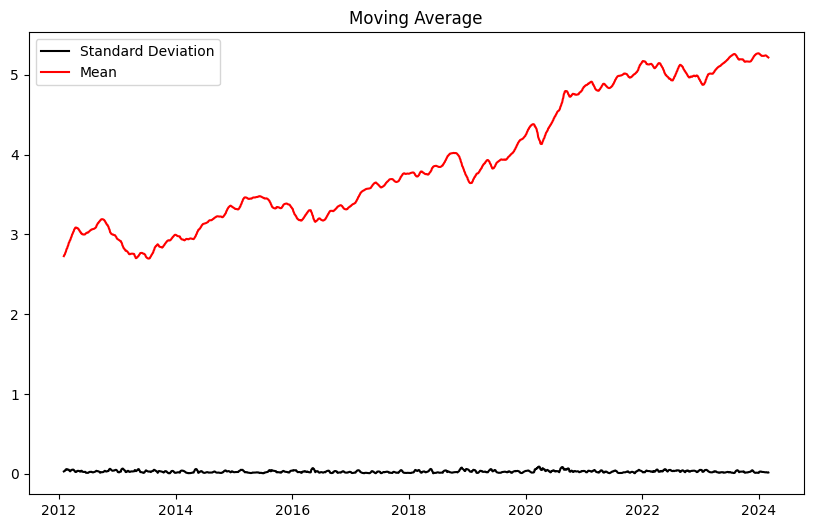

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(20).mean()
std_dev = df_log.rolling(20).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

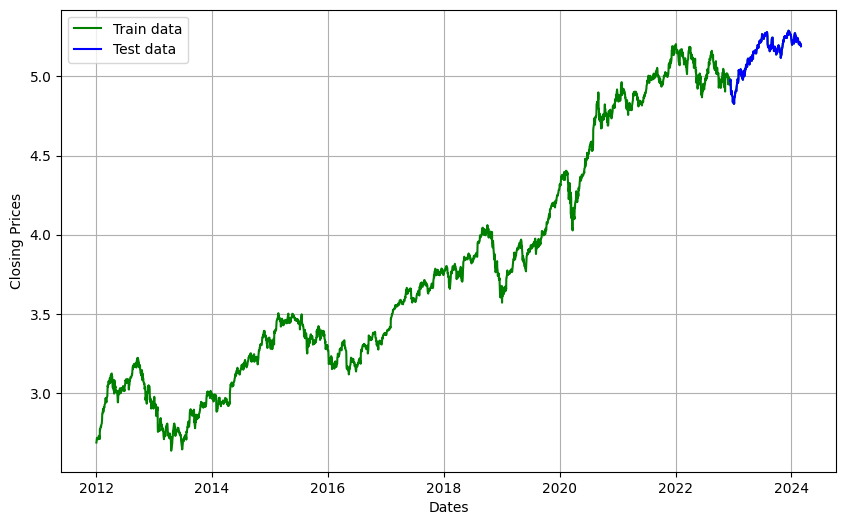

In [14]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [15]:
!pip install pmdarima -q

In [16]:
from pmdarima.arima import auto_arima
autoARIMA = auto_arima(train_data,
                      start_p = 0,
                      start_q=0,
                      max_d=5,
                      start_Q=0, 
                       max_P=5, 
                       max_D=5,
                        max_Q=5,
                      seasonal=True,
                       error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=42,n_fits = 50 )

autoARIMA.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14181.473, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14188.713, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14188.901, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14178.044, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14187.281, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14187.133, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14185.281, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14184.763, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.549 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2751
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7097.451
Date:                Sat, 02 Mar 2024   AIC                         -14188.901
Time:                        14:31:20   BIC                         -14171.143
Sample:                             0   HQIC                        -14182.486
                               - 2751                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.000      2.421      0.015       0.000       0.001
ma.L1         -0.0587      0.013     -4.567      0.000      -0.084      -0.033
sigma2         0.0003   4.98e-06     67.391      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3500.35
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

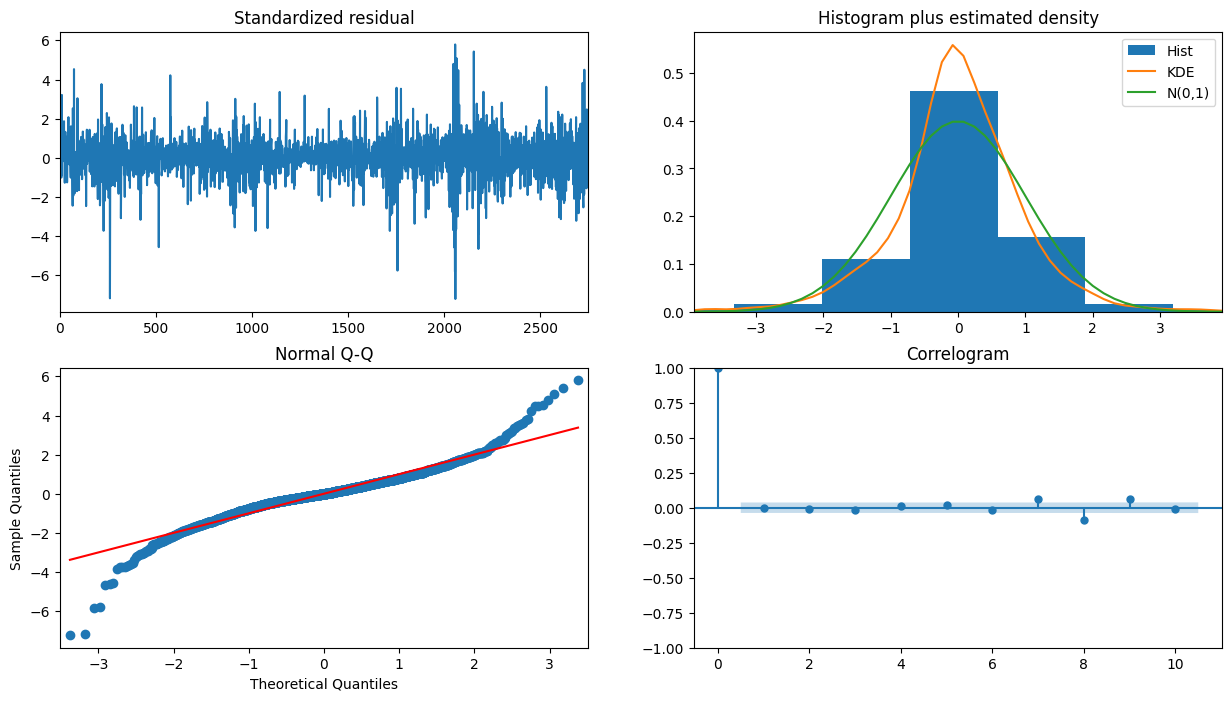

In [17]:
autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [18]:
autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2751
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7097.451
Date:                Sat, 02 Mar 2024   AIC                         -14188.901
Time:                        14:31:37   BIC                         -14171.143
Sample:                             0   HQIC                        -14182.486
                               - 2751                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.000      2.421      0.015       0.000       0.001
ma.L1         -0.0587      0.013     -4.567      0.000      -0.084      -0.033
sigma2         0.0003   4.98e-06     67.391      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3500.35
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
prediction, confint =autoARIMA.predict(n_periods=306,return_conf_int=True)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [53]:
cf= pd.DataFrame(confint)

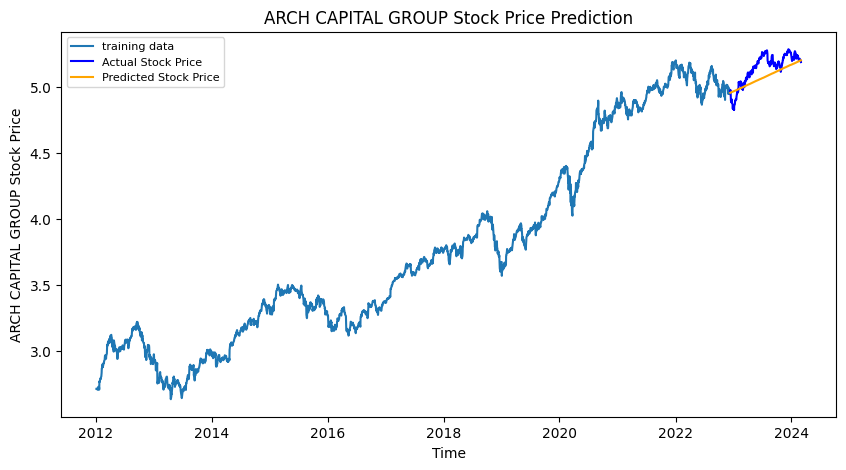

In [66]:

plt.figure(figsize=(10,5))
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(predictions, color = 'orange',label='Predicted Stock Price')

plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Prophet

In [10]:
from prophet import Prophet
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
plt.style.use('fivethirtyeight')

df['Date']=df.index

In [11]:
df['Date'].iloc[0]

Timestamp('2012-01-03 00:00:00')

In [12]:
df = df.reset_index(drop=True)[['Date','Close']]

In [13]:
df

Date       Close
0    2012-01-03   14.686786
1    2012-01-04   14.765714
2    2012-01-05   14.929643
3    2012-01-06   15.085714
4    2012-01-09   15.061786
...         ...         ...
3055 2024-02-26  181.160004
3056 2024-02-27  182.630005
3057 2024-02-28  181.419998
3058 2024-02-29  180.750000
3059 2024-03-01  179.660004

[3060 rows x 2 columns]

In [15]:
df=df.rename(columns={'Date': 'ds',
                        'Close': 'y'})

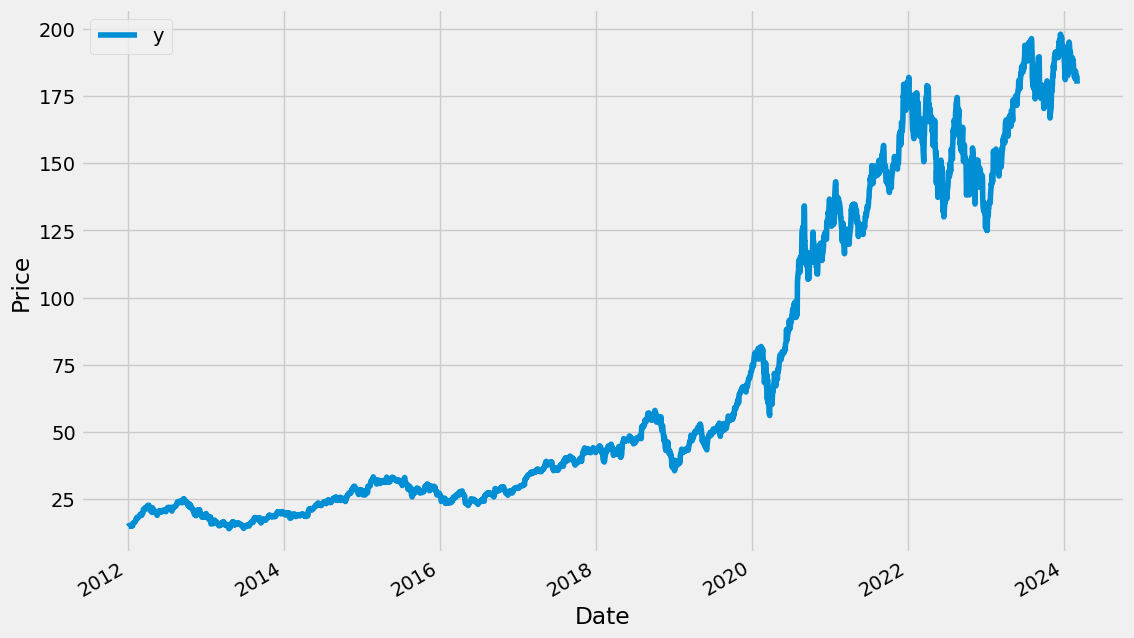

In [16]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [17]:
pmodel = Prophet(interval_width=0.95)

In [18]:
pmodel.fit(df)

16:27:34 - cmdstanpy - INFO - Chain [1] start processing
16:27:35 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future_dates = pmodel.make_future_dataframe(periods=100, freq='D', include_history=True)


In [26]:
future_dates.tail()

ds
3155 2024-06-05
3156 2024-06-06
3157 2024-06-07
3158 2024-06-08
3159 2024-06-09

In [30]:
forecast = pmodel.predict(future_dates)

In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
3155 2024-06-05  183.541749  168.930328  198.866924
3156 2024-06-06  183.558982  169.483613  197.628062
3157 2024-06-07  183.539800  168.526238  198.386331
3158 2024-06-08  179.833411  164.546254  194.277805
3159 2024-06-09  179.898407  164.924678  194.216209

* ds: the datestamp of the forecasted value
* yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* yhat_lower: the lower bound of our forecasts
* yhat_upper: the upper bound of our forecasts

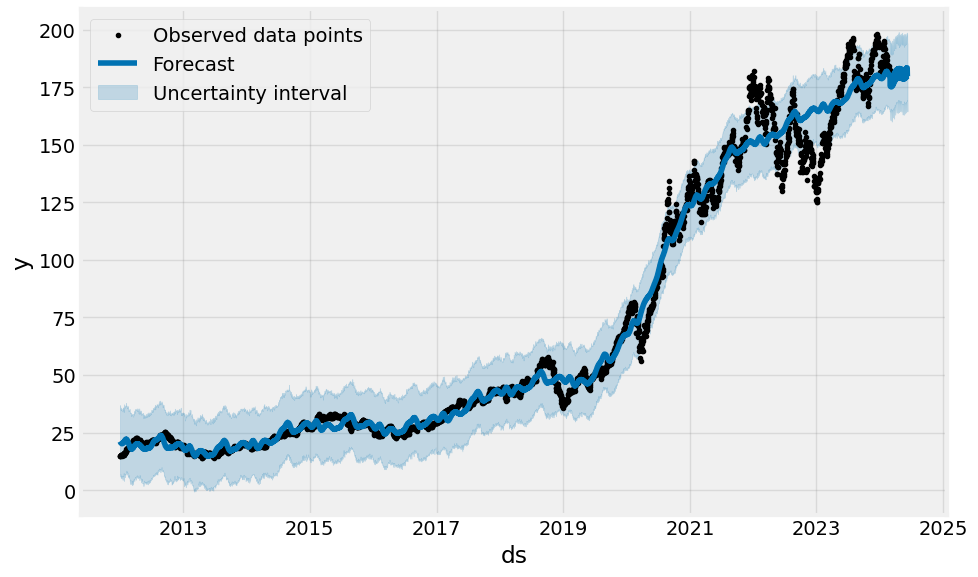

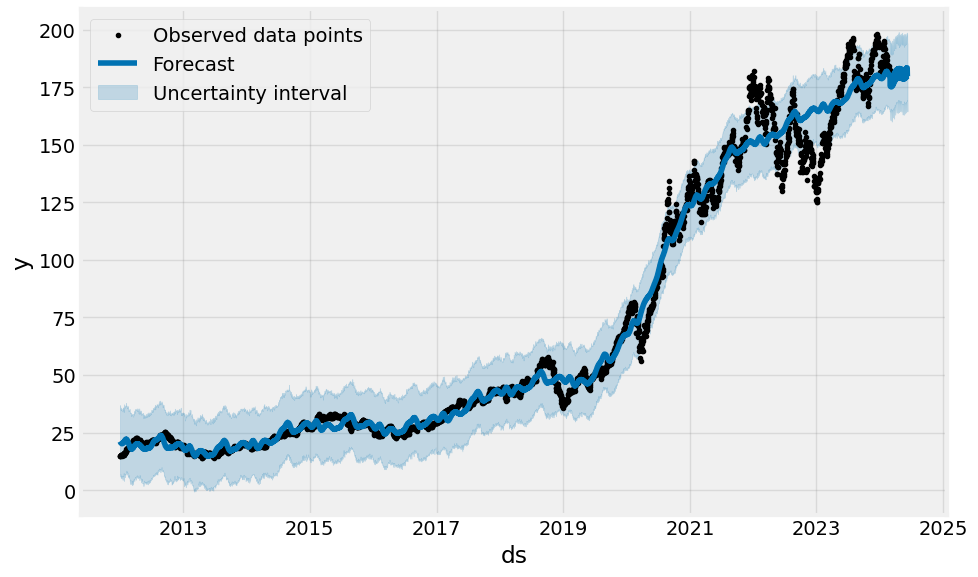

In [36]:
pmodel.plot(forecast,include_legend=True)

In [ ]:
pmodel.plot_components(forecast)

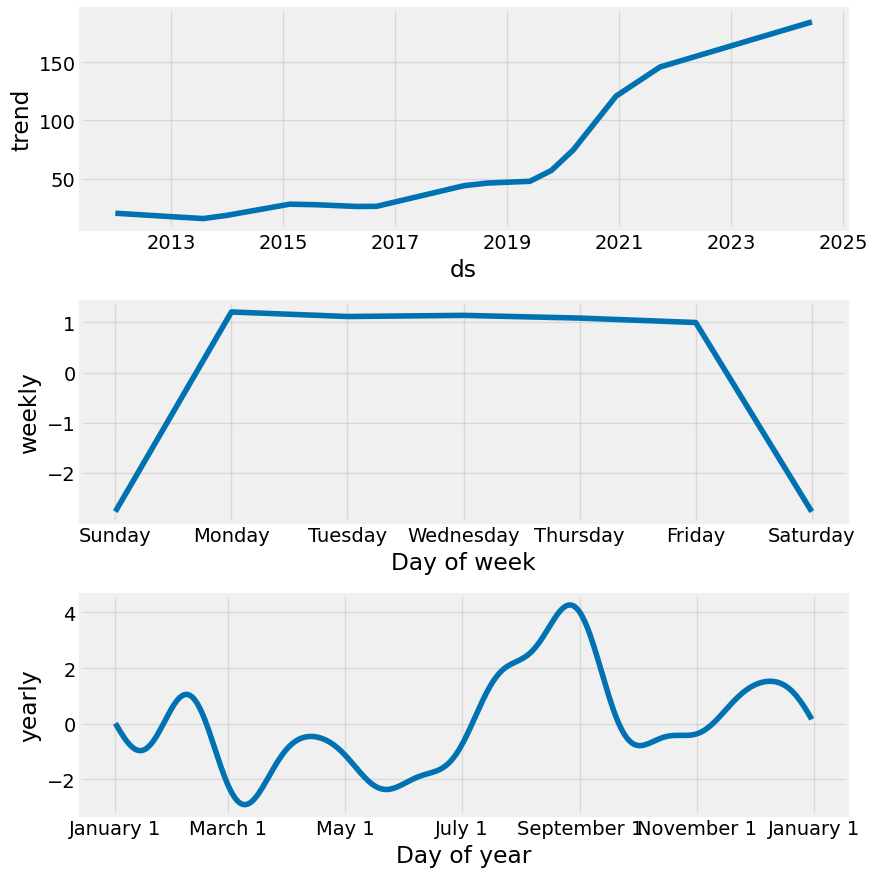

In [39]:
fig1 = pmodel.plot_components(forecast)

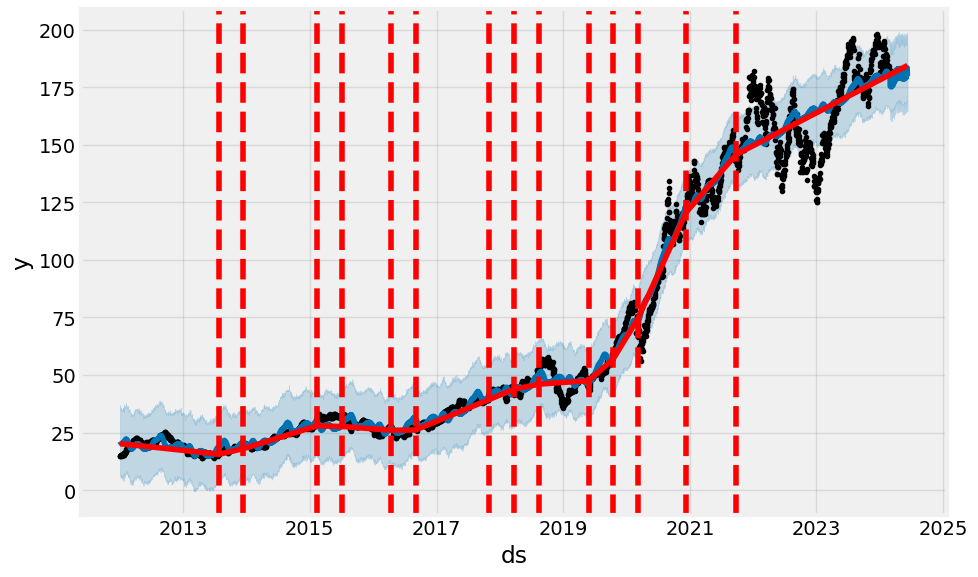

In [43]:
from prophet.plot import add_changepoints_to_plot

fig = pmodel.plot(forecast)

a= add_changepoints_to_plot(fig.gca(), pmodel, forecast)

In [54]:
train_df=df[:2754]

In [62]:
test_df=pd.DataFrame(df[2754:]['ds'])

In [65]:
pmodel = Prophet(interval_width=0.95)
pmodel.fit(train_df)

17:03:44 - cmdstanpy - INFO - Chain [1] start processing
17:03:46 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
fcst = pmodel.predict(test_df)

fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
301 2024-02-26  189.984338  152.323325  231.943436
302 2024-02-27  189.862691  150.861099  232.050021
303 2024-02-28  189.742288  151.950464  232.540058
304 2024-02-29  189.522412  149.748572  232.453547
305 2024-03-01  189.309729  148.240166  233.039270

In [78]:
fcstp = fcst[['ds','yhat']]

fcstp =fcstp.set_index('ds')
fcstp


yhat
ds                    
2022-12-12  167.705811
2022-12-13  167.954058
2022-12-14  168.193143
2022-12-15  168.318734
2022-12-16  168.434070
...                ...
2024-02-26  189.984338
2024-02-27  189.862691
2024-02-28  189.742288
2024-02-29  189.522412
2024-03-01  189.309729

[306 rows x 1 columns]

In [74]:
trp = train_df.set_index('ds')
tep = df[2754:].set_index('ds')
tep

y
ds                    
2022-12-12  144.490005
2022-12-13  145.470001
2022-12-14  143.210007
2022-12-15  136.500000
2022-12-16  134.509995
...                ...
2024-02-26  181.160004
2024-02-27  182.630005
2024-02-28  181.419998
2024-02-29  180.750000
2024-03-01  179.660004

[306 rows x 1 columns]

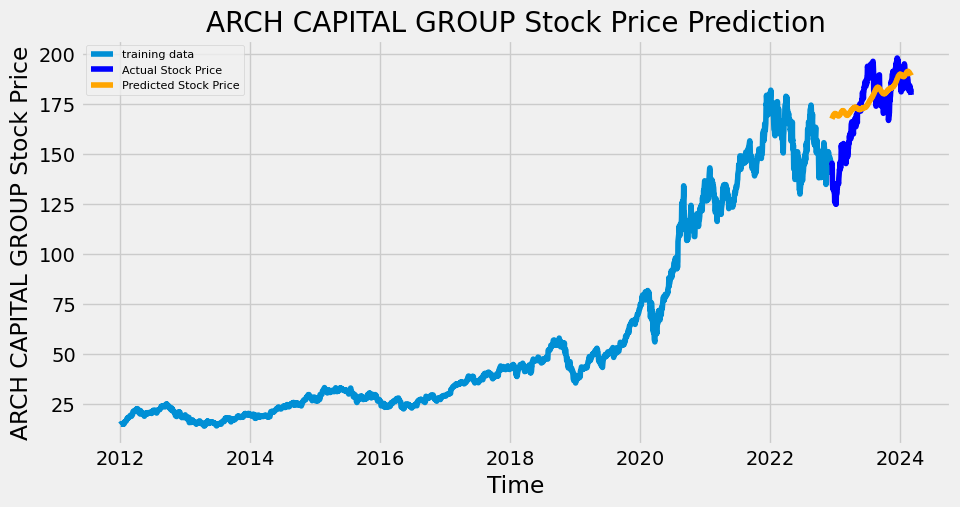

In [80]:
plt.figure(figsize=(10,5))

plt.plot(trp, label='training data')
plt.plot(tep, color = 'blue', label='Actual Stock Price')
plt.plot(fcstp, color = 'orange',label='Predicted Stock Price')

plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [84]:
print_error_metrics(tep.values,fcstp.values)

MAE: 11.343317805576708
RMSE 15.12987720535394
MAPE: 7.240153402478587 %
MASE: 15.12987720535394
